# Color Threshold, Green Screen

### Import resources

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [10]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


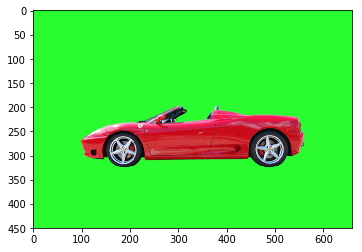

In [11]:
# Display the image
plt.imshow(image)

### Define the color threshold

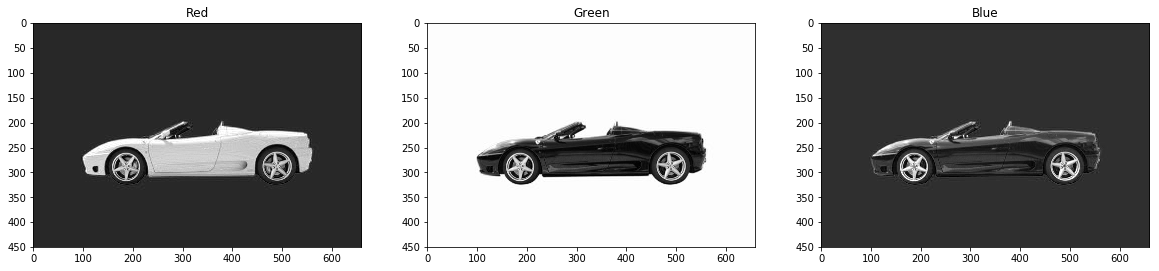

In [15]:
image_cpy = np.copy(image)
r = image_cpy[:,:,0]
g = image_cpy[:,:,1]
b = image_cpy[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.set_title('Red')
ax1.imshow(r,cmap='gray')
ax2.set_title('Green')
ax2.imshow(g,cmap='gray')
ax3.set_title('Blue')
ax3.imshow(b,cmap='gray')

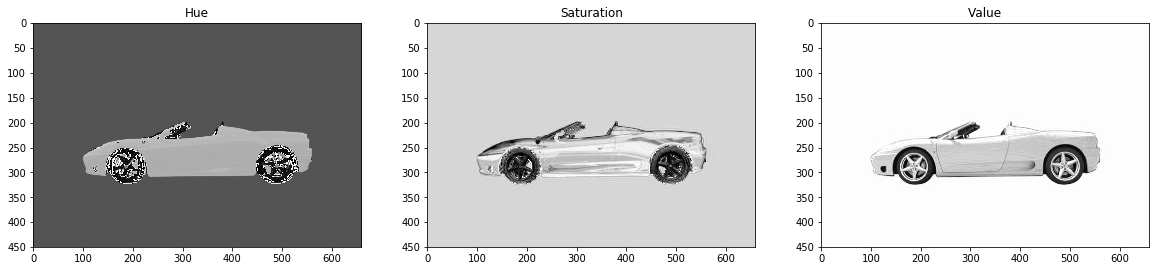

In [19]:
hsv_car = cv2.cvtColor(image_cpy,cv2.COLOR_BGR2HSV)
h = hsv_car[:,:,0]
s = hsv_car[:,:,1]
v = hsv_car[:,:,2]

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.set_title('Hue')
ax1.imshow(h,cmap='gray')
ax2.set_title('Saturation')
ax2.imshow(s,cmap='gray')
ax3.set_title('Value')
ax3.imshow(v,cmap='gray')

In [22]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )


[[[ 60 255 255]]]


In [92]:
## TODO: Define our color selection boundaries in RGB values

#lower_green = np.array([15,75,17]) #45,252,40
#lower_green = np.array([41,75,25]) 
lower_green = np.array([20,51,0]) 
#upper_green = np.array([45,253,47])
upper_green = np.array([189, 255, 230]) #45,209,48

### Create a mask

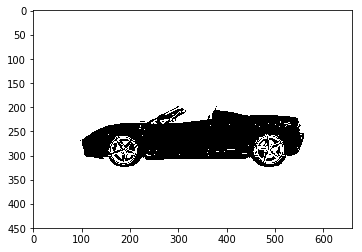

In [93]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

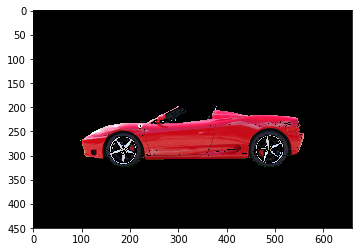

In [94]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

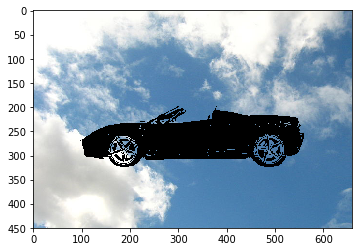

In [102]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
bg = np.copy(background_image)[0:image.shape[0],0:image.shape[1]]

mask_bg = np.copy(bg)
mask_bg[mask==0] = [0,0,0]
plt.imshow(mask_bg)

## TODO: Crop it or resize the background to be the right size (450x660)

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image

## TODO: Display the background and make sure 


### Create a complete image

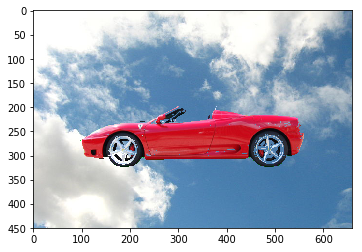

In [105]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
complete_image = masked_image + mask_bg
plt.imshow(complete_image)
